# Визуализация данных



## Этап 1. Подгрузка данных

### 1.1. Знакомство с данными

In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Импортируем все необходимые для работы бибилотеки

In [ ]:
!pip freeze | grep "numpy\|pandas\|lightgbm\|scikit-learn"

# Сохраняем данные о библиотеках, а также об их версиях

geopandas==0.13.2
lightgbm==4.1.0
numpy==1.25.2
pandas==1.5.3
pandas-datareader==0.10.0
pandas-gbq==0.19.2
pandas-stubs==1.5.3.230304
scikit-learn==1.2.2
sklearn-pandas==2.2.0


In [ ]:
# Подключаем данные облака Google Drive для работы
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_data = pd.read_parquet('/content/drive/MyDrive/Purple_Hack/train_data.pqt') # Подгружаем файл тренировочных данных
test_data = pd.read_parquet('/content/drive/MyDrive/Purple_Hack/test_data.pqt') # Подгружаем файл тестовых данных
sample_submission = pd.read_csv('/content/drive/MyDrive/Purple_Hack/sample_submission.csv') # Подгружаем файл с прежполагаемым результатом

Считаем файл feature_description.xlsx, чтобы получить названия столбцов вмете с их описанием


In [ ]:
feature = pd.read_excel('/content/drive/MyDrive/Purple_Hack/feature_description.xlsx')
feature.head()

,Признак,Описание,Тип
0,start_cluster,Стартовый кластер клиента,category
1,balance_amt_avg,Среднемесячный остаток на счетах клиента за месяц,number
2,balance_amt_max,Максимальный остаток на счетах клиента за месяц,number
3,balance_amt_min,Минимальный остаток на счетах клиента за месяц,number
4,balance_amt_day_avg,Среднедневной остаток на счетах клиента за месяц,number


__Обозначим известные нам значения столбцов__

1. *start_cluster* - Стартовый кластер клиента
2. *balance_amt_avg* - Среднемесячный остаток на счетах клиента за месяц
3. *balance_amt_max* - Максимальный остаток на счетах клиента за месяц
4. *balance_amt_min* - Минимальный остаток на счетах клиента за месяц
5. *balance_amt_day_avg* - Среднедневной остаток на счетах клиента за месяц
6. *channel_code* - Символьный код канала продаж, через который клиент пришел в банк
7. *city* - Населенный пункт
8. *city_type* - Тип населенного пункта
9. *index_city_code* - Код города в почтовом индексе
10. *ogrn_days_end_month* - Количество дней с момента регистрации ОГРН до конца месяца
11. *ogrn_days_end_quarter* - Количество дней с момента регистрации ОГРН до конца квартала
12. *ogrn_month* - Месяц получения ОГРН
13. *ogrn_year* - Год получения ОГРН
14. *ft_registration_date* - Количество дней с даты регистрации в ФНС
15. *max_founderpres* - Количество дней, прошедших с первой даты регистрации огрн
16. *min_founderpres* - Количество дней, прошедших с последней даты регистрации огрн
17. *ogrn_exist_months* - Количество полных месяцев, прошедших с момента получения ОГРН
18. *okved* - Первые два знака ОКВЭД
19. *segment* - Группа доходности клиента
20. *sum_of_paym_2m* - Сумма операций клиента за последние 2 месяца
21. *sum_of_paym_6m* - Сумма операций клиента за последние 6 месяцев
22. *sum_of_paym_1y* - Сумма операций клиента за последний год
23. *sum_a_oper_1m* - Сумма операций "A" за 1 месяц
24. *cnt_a_oper_1m* - Кол-во операций "A" за 1 месяц
25. *sum_b_oper_1m* - Сумма операций "B" за 1 месяц
26. *cnt_b_oper_1m* - Кол-во операций "B" за 1 месяц
27. *sum_c_oper_1m* - Сумма операций "C" за 1 месяц
28. *cnt_c_oper_1m* - Кол-во операций "C" за 1 месяц
29. *sum_deb_d_oper_1m* - Сумма исходящих операций "D" за 1 месяц
30. *cnt_deb_d_oper_1m* - Кол-во исходящих операций "D" за 1 месяц
31. *sum_cred_d_oper_1m* - Сумма входящих операций "D" за 1 месяц
32. *cnt_cred_d_oper_1m* - Кол-во входящих операций "D" за 1 месяц
33. *sum_deb_e_oper_1m* - Сумма исходящих операций "E" за 1 месяц
34. *cnt_deb_e_oper_1m* - Кол-во исходящих операций "E" за 1 месяц
35. *cnt_days_deb_e_oper_1m* - Кол-во дней с исходящими операциями "E" за 1 месяц
36. *sum_cred_e_oper_1m* - Сумма входящих операций "E" за 1 месяц
37. *cnt_cred_e_oper_1m* - Кол-во входящих операций "E" за 1 месяц
38. *cnt_days_cred_e_oper_1m* - Кол-во дней с входящими операциями "E" за 1 месяц
39. *sum_deb_f_oper_1m* - Сумма исходящих операций "F" за 1 месяц
40. *cnt_deb_f_oper_1m* - Кол-во исходящих операций "F" за 1 месяц
41. *cnt_days_deb_f_oper_1m* - Кол-во дней с исходящими операциями "F" за 1 месяц
42. *sum_cred_f_oper_1m* - Сумма входящих операций "F" за 1 месяц
43. *cnt_cred_f_oper_1m* - Кол-во входящих операций "F" за 1 месяц
44. *cnt_days_cred_f_oper_1m* - Кол-во дней с входящими операциями "F" за 1 месяц
45. *sum_deb_g_oper_1m* - Сумма исходящих операций "G" за 1 месяц
46. *cnt_deb_g_oper_1m* - Кол-во исходящих операций "G" за 1 месяц
47. *cnt_days_deb_g_oper_1m* - Кол-во дней с исходящими операциями "G" за 1 месяц
48. *sum_cred_g_oper_1m* - Сумма входящих операций "G" за 1 месяц
49. *cnt_cred_g_oper_1m* - Кол-во входящих операций "G" за 1 месяц
50. *cnt_days_cred_g_oper_1m* - Кол-во дней с входящими операциями "G" за 1 месяц
51. *sum_deb_h_oper_1m* - Сумма исходящих операций "H" за 1 месяц
52. *cnt_deb_h_oper_1m* - Кол-во исходящих операций "H" за 1 месяц
53. *cnt_days_deb_h_oper_1m* - Кол-во дней с исходящими операциями "H" за 1 месяц
54. *sum_cred_h_oper_1m* - Сумма входящих операций "H" за 1 месяц
55. *cnt_cred_h_oper_1m* - Кол-во входящих операций "H" за 1 месяц
56. *cnt_days_cred_h_oper_1m* - Кол-во дней с входящими операциями "H" за 1 месяц
57. *sum_a_oper_3m* - Сумма операций "A" за 3 месяца
58. *cnt_a_oper_3m* - Кол-во операций "A" за 3 месяца
59. *sum_b_oper_3m* - Сумма операций "B" за 3 месяца
60. *cnt_b_oper_3m* - Кол-во операций "B" за 3 месяца
61. *sum_c_oper_3m* - Сумма операций "C" за 3 месяца
62. *cnt_c_oper_3m* - Кол-во операций "C" за 3 месяца
63. *sum_deb_d_oper_3m* - Сумма исходящих операций "D" за 3 месяца
64. *cnt_deb_d_oper_3m* - Кол-во исходящих операций "D" за 3 месяца
65. *sum_cred_d_oper_3m* - Сумма входящих операций "D" за 3 месяца
66. *cnt_cred_d_oper_3m* - Кол-во входящих операций "D" за 3 месяца
67. *sum_deb_e_oper_3m* - Сумма исходящих операций "E" за 3 месяца
68. *cnt_deb_e_oper_3m* - Кол-во исходящих операций "E" за 3 месяца
69. *cnt_days_deb_e_oper_3m* - Кол-во дней с исходящими операциями "E" за 3 месяца
70. *sum_cred_e_oper_3m* - Сумма входящих операций "E" за 3 месяца
71. *cnt_cred_e_oper_3m* - Кол-во входящих операций "E" за 3 месяца
72. *cnt_days_cred_e_oper_3m* - Кол-во дней с входящими операциями "E" за 3 месяца
73. *sum_deb_f_oper_3m* - Сумма исходящих операций "F" за 3 месяца
74. *cnt_deb_f_oper_3m* - Кол-во исходящих операций "F" за 3 месяца
75. *cnt_days_deb_f_oper_3m* - Кол-во дней с исходящими операциями "F" за 3 месяца
76. *sum_cred_f_oper_3m* - Сумма входящих операций "F" за 3 месяца
77. *cnt_cred_f_oper_3m* - Кол-во входящих операций "F" за 3 месяца
78. *cnt_days_cred_f_oper_3m* - Кол-во дней с входящими операциями "F" за 3 месяца
79. *sum_deb_g_oper_3m* - Сумма исходящих операций "G" за 3 месяца
80. *cnt_deb_g_oper_3m* - Кол-во исходящих операций "G" за 3 месяца
81. *cnt_days_deb_g_oper_3m* - Кол-во дней с исходящими операциями "G" за 3 месяца
82. *sum_cred_g_oper_3m* - Сумма входящих операций "G" за 3 месяца
83. *cnt_cred_g_oper_3m* - Кол-во входящих операций "G" за 3 месяца
84. *cnt_days_cred_g_oper_3m* - Кол-во дней с входящими операциями "G" за 3 месяца
85. *sum_deb_h_oper_3m* - Сумма исходящих операций "H" за 3 месяца
86. *cnt_deb_h_oper_3m* - Кол-во исходящих операций "H" за 3 месяца
87. *cnt_days_deb_h_oper_3m* - Кол-во дней с исходящими операциями "H" за 3 месяца
88. *sum_cred_h_oper_3m* - Сумма входящих операций "H" за 3 месяца
89. *cnt_cred_h_oper_3m* - Кол-во входящих операций "H" за 3 месяца
90. *cnt_days_cred_h_oper_3m* - Кол-во дней с входящими операциями "H" за 3 месяца

В наших данных train_data имеется 93 стообца, в то время как описаны лишь 90. Получим названия тех столбцов, о которых ничего не сказано в описании

In [ ]:
feature_list = list(feature['Признак'])
train_data_list = list(train_data.columns)
test_data_list = list(test_data.columns)

train_not_feature_list = list()
for col in train_data_list:
  if col not in feature_list:
    train_not_feature_list.append(col)

print('Столбцы, которые не описаны в train_data - {}'.format(train_not_feature_list), end='\n\n')


test_not_feature_list = list()
for col in test_data_list:
  if col not in feature_list:
    test_not_feature_list.append(col)

print('Столбцы, которые не описаны в test_data - {}'.format(test_not_feature_list))


Столбцы, которые не описаны в train_data - ['id', 'date', 'end_cluster']

Столбцы, которые не описаны в test_data - ['id', 'date']


Как видно, среди всех столбцов датафрейме train_data у нас нет описания:
* __'id'__ - уникальный идентефикатор клиента
* __'date'__ - дата, а точнее месяц, получения данных
* __'end_cluster'__ - конечный кластер продуктов клиента, через год (т.е. для тестовых данных - целевая переменная)

Значения столбцов __'id'__, __'date'__ в датафрейме test_data совпадают со значениями этих же столбцов датафрейма train_data

### 1.2. Общие признаки файла train_data.pqt

In [ ]:
print('В файле train_data всего {} строк и {} столбцов'.format(train_data.shape[0], train_data.shape[1]))

В файле train_data всего 600000 строк и 93 столбцов


Рассмотрим столцы, из которых состоит файл train


In [ ]:
display(*train_data.columns)

'id'

'date'

'balance_amt_avg'

'balance_amt_max'

'balance_amt_min'

'balance_amt_day_avg'

'channel_code'

'city'

'city_type'

'index_city_code'

'ogrn_days_end_month'

'ogrn_days_end_quarter'

'ogrn_month'

'ogrn_year'

'ft_registration_date'

'max_founderpres'

'min_founderpres'

'ogrn_exist_months'

'okved'

'segment'

'sum_of_paym_2m'

'sum_of_paym_6m'

'sum_of_paym_1y'

'sum_a_oper_1m'

'cnt_a_oper_1m'

'sum_b_oper_1m'

'cnt_b_oper_1m'

'sum_c_oper_1m'

'cnt_c_oper_1m'

'sum_deb_d_oper_1m'

'cnt_deb_d_oper_1m'

'sum_cred_d_oper_1m'

'cnt_cred_d_oper_1m'

'sum_deb_e_oper_1m'

'cnt_deb_e_oper_1m'

'cnt_days_deb_e_oper_1m'

'sum_cred_e_oper_1m'

'cnt_cred_e_oper_1m'

'cnt_days_cred_e_oper_1m'

'sum_deb_f_oper_1m'

'cnt_deb_f_oper_1m'

'cnt_days_deb_f_oper_1m'

'sum_cred_f_oper_1m'

'cnt_cred_f_oper_1m'

'cnt_days_cred_f_oper_1m'

'sum_deb_g_oper_1m'

'cnt_deb_g_oper_1m'

'cnt_days_deb_g_oper_1m'

'sum_cred_g_oper_1m'

'cnt_cred_g_oper_1m'

'cnt_days_cred_g_oper_1m'

'sum_deb_h_oper_1m'

'cnt_deb_h_oper_1m'

'cnt_days_deb_h_oper_1m'

'sum_cred_h_oper_1m'

'cnt_cred_h_oper_1m'

'cnt_days_cred_h_oper_1m'

'sum_a_oper_3m'

'cnt_a_oper_3m'

'sum_b_oper_3m'

'cnt_b_oper_3m'

'sum_c_oper_3m'

'cnt_c_oper_3m'

'sum_deb_d_oper_3m'

'cnt_deb_d_oper_3m'

'sum_cred_d_oper_3m'

'cnt_cred_d_oper_3m'

'sum_deb_e_oper_3m'

'cnt_deb_e_oper_3m'

'cnt_days_deb_e_oper_3m'

'sum_cred_e_oper_3m'

'cnt_cred_e_oper_3m'

'cnt_days_cred_e_oper_3m'

'sum_deb_f_oper_3m'

'cnt_deb_f_oper_3m'

'cnt_days_deb_f_oper_3m'

'sum_cred_f_oper_3m'

'cnt_cred_f_oper_3m'

'cnt_days_cred_f_oper_3m'

'sum_deb_g_oper_3m'

'cnt_deb_g_oper_3m'

'cnt_days_deb_g_oper_3m'

'sum_cred_g_oper_3m'

'cnt_cred_g_oper_3m'

'cnt_days_cred_g_oper_3m'

'sum_deb_h_oper_3m'

'cnt_deb_h_oper_3m'

'cnt_days_deb_h_oper_3m'

'sum_cred_h_oper_3m'

'cnt_cred_h_oper_3m'

'cnt_days_cred_h_oper_3m'

'start_cluster'

'end_cluster'

In [ ]:
print('Всего в train_data {} столбца'.format(len(train_data.columns)))

Всего в train_data 93 столбца


Выведем информацию о датафрейме, с помощью метода info, чтобы понять какая часть из столбцов является категориальной, а какая-числово

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 93 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       600000 non-null  int64  
 1   date                     600000 non-null  object 
 2   balance_amt_avg          534423 non-null  float64
 3   balance_amt_max          534423 non-null  float64
 4   balance_amt_min          534423 non-null  float64
 5   balance_amt_day_avg      534423 non-null  float64
 6   channel_code             557150 non-null  object 
 7   city                     521656 non-null  object 
 8   city_type                521656 non-null  object 
 9   index_city_code          274776 non-null  object 
 10  ogrn_days_end_month      568527 non-null  float64
 11  ogrn_days_end_quarter    568527 non-null  float64
 12  ogrn_month               568527 non-null  object 
 13  ogrn_year                568527 non-null  object 
 14  ft_r

В наших тренировочных данных присутствует 11 столбцов с категориальными признаками. Выделим категориальные и числовые столбцы датафрема


In [ ]:
object_columns_train = [s for s in train_data.columns if train_data[s].dtypes == 'object']
print('{} - категориальные столбцы датасета, всего их - {} штук'.format(object_columns_train, len(object_columns_train)))

['date', 'channel_code', 'city', 'city_type', 'index_city_code', 'ogrn_month', 'ogrn_year', 'okved', 'segment', 'start_cluster', 'end_cluster'] - категориальные столбцы датасета, всего их - 11 штук


Как видно нам удалось получить все 11 столбцов, содержащих категориальные признаки, теперь получим числовые признаки датасета train_data

In [ ]:
numeric_columns_train = list(frozenset(train_data.columns).difference(set(object_columns_train)))
print('Всего числовых столбцов - {} штуки'.format(len(numeric_columns_train)))

Всего числовых столбцов - 82 штуки


Как видно, данные о числовых столбцах получены верно, поскольку датафрейм содержит 81 столбец в формате float64 и 1 в формате int64

### 1.3. Статистические признаки столбцов датафрейма train_data

Получим основные статистические признаки для категориальных столбцов датафрейма

In [ ]:
train_data[object_columns_train].describe()

,date,channel_code,city,city_type,index_city_code,ogrn_month,ogrn_year,okved,segment,start_cluster,end_cluster
count,600000,557150,521656,521656,274776,568527,568527,568107,569849,600000,600000
unique,3,45,8917,7931,233,12,21,88,4,17,17
top,month_1,channel_code_8,city_0,city_type_0,index_city_code_46,ogrn_month_0,ogrn_year_4,okved_5,segment_3,{α},{α}
freq,200000,102296,86234,464866,9548,53802,96198,86891,341965,375947,318670


Как видно в тренировочных данных о категориальных признаках, можно утверждать следующее:

1. В столбце __'date'__ у нас имеется всего 3 уникальных значения месяцев
2. У банка имеется 45 каналов продаж, через которые клиент может прийти в банк __"channel_code"__
3. Всего имеется информация о 8917 городах клиентов, при этом типов городов только 7931
4. Имеется 233 индекса городов, однако более половины данных не заполнены
5. В __'ogrn_month'__ есть всего 12 значений (по числу месяцев), тогда как в __'ogrn_year'__ есть 21 уникальное значение
6. Представлено 4 группы доходности клиента __'segment'__
7. Имеется 17 стартовых и 17 конечных кластеров, при этом более половины значений клиентов, что в первом, что во втором случае, составляют кластеры {$a$}


Перейдем с статистическим признакам числовых столбцов датафрейма

Ввиду того, что у нас имеется 82 числовых признака, полученные данные будут слишком большими для восприятия, поэтому работу с числовыми признаками мы проведем, при построении визуализаций.

### 1.4. Визуализация признаков датафрейма train_data

#### Визуализируем категориальные признаки датафрейма



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

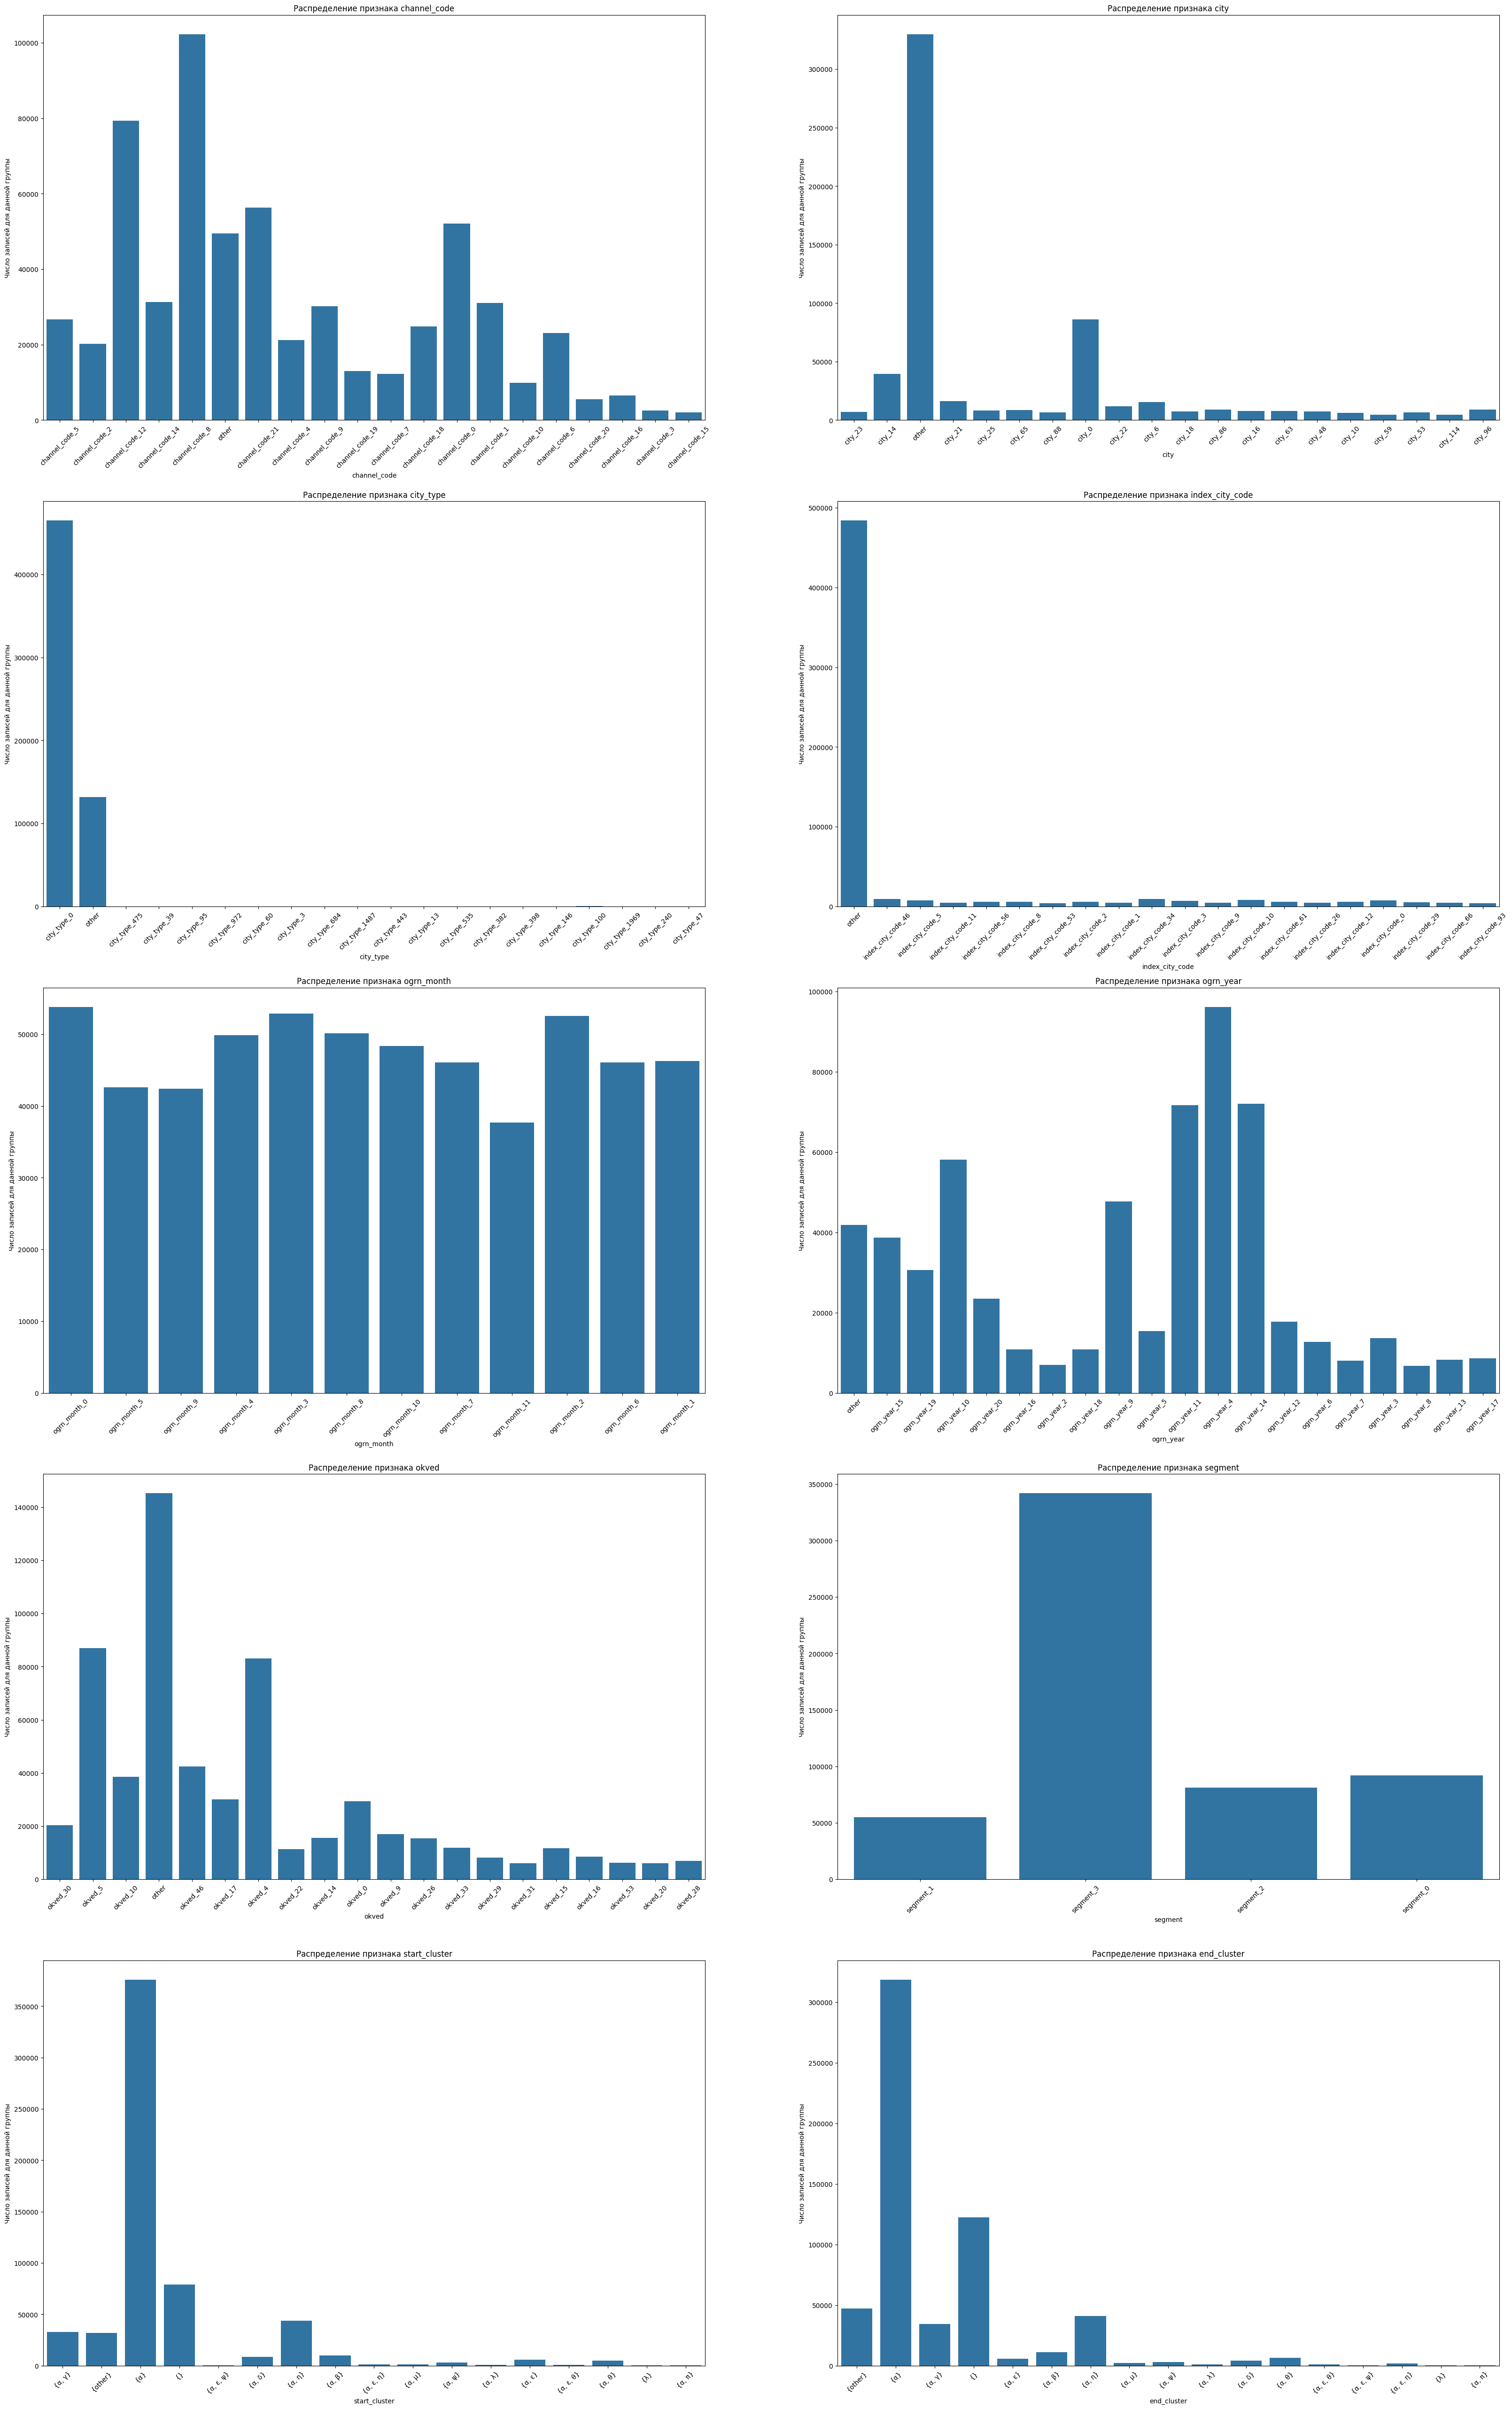

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(40, 65))    # Создаем пространтсво для визуализаций
plot_train = train_data.copy()                                  # Создаем копию данных, чтобы не менять изначальный датасет


position=0                    # Создаем перемнную, содержащую позицию признака в списке категориальных
for x in range(5):            # Проходимся по строкам таблицы изображения
  for y in range(2):          # Проходимся по столбцам таблицы изображения
    position += 1             # Изменяем счетчик позиции признака, признак date визуализировать не будем

    if len(plot_train[object_columns_train[position]].value_counts()) > 20:
      hist_top_values = plot_train[object_columns_train[position]].value_counts()[:19]                                                                      # Получаем топ-20 значений каждого признака, если значений меньше 20, то только сами значения
      plot_train[object_columns_train[position]] = plot_train[object_columns_train[position]].apply(lambda e: e if e in hist_top_values else 'other')       # Изменяем признаки на "другой", если он не входит в топ-20
    else:
        hist_top_values = plot_train[object_columns_train[position]].value_counts()

    sns.countplot(x=plot_train[object_columns_train[position]], ax=axes[x][y]);               # Создаем диаграмму подсчета
    axes[x][y].set_title('Распределение признака {}'.format(object_columns_train[position])); # Добавляем заголовок
    axes[x][y].xaxis.set_tick_params(rotation=45);                                            # Поворачиваем метки, чтобы избежать наложения друг на друга
    axes[x][y].set_ylabel('Число записей для данной группы');                                 # Добавляем надпись оси y



#### Выводы по визуализации категориальных признаков train_data

__Признак channel_code__

Как видно из построенного графика, наибольшее число клиентов приходит через каналы с кодами 0, 8, 12, 21. Клиенты, приходящие по данным каналом составляют более 50% от числа пришедших клиентов. На пятом месте находится суммарное число клиентов, пришедих из каналов, не вошедших в топ-20. Можно сделать вывод о том, что все 45 каналов привлечения не имеют большого смысла и Альфа-банку выгоднее сфокусироваться на топ-20 каналах привлечения, поскольку они дадт больше пользы, нежели все 45 каналов.

__Признак city__

Признак города, их которого пришел клиент, один из наиболее важных среди всех существующих признаков. При общем числе городов в 8917 штук, выделение 20-ти с наибольшим числом клиентов не дает четкого понимания данных. Поэтому во время преобразования признаков имеет смысл оставить больше число уникальных городов

__Признак city_type__

Большинство из городов, указанных в данных имеют city_type0. При обработке данных следует удалить все иные значения и заменить их на 'other', т.к. это может повысить качество обучения модели.

__Признак index_city_code__

Данный признак следует учитывать, при предсказании кластера, поскольку в нем есть огромное количество разных значений, при этом их частота достаточно маленькая и выделить явный максимум по числу крайне трудно.

__Признак ogrn_month__

Распределение данного признака одно из наиболее равномерных. Лидеры здесь это 0-ой, 2-ой и 3-ий месяцы. Однако в целом данные выглядат достаточно понятно и не возникает особых между ними различий.

__Признак ogrn_year__

Наибольшее число клиентов банка получили ОГРН в год 4, 14, 11, 9 или 10. В целом, оставшиеся года можно выделить в отдельную группу не опасаясь ухудшения проноза данных.

__Признак okved__

Первые два знака ОКВЭД - это достаточно уникальный признак, поскольку это 5 или 6-цифренное значение. Следоавтельно есть ровно 100 возможных комбинаций первых цифр от 00 до 99. Среди данных особенно популярны значения, закадированные как okved_4 и okved_5. Однако включение в рассмотрение только топ-20 вариантов будет ошибочным, поскольку этот признак достаточно серьезно влияет на предсказание.

__Признак segment__

Один из самых простых признаков для визуализации. Всего имеется 4 представленных группы доходности клиента, при этом сегмент 3 наиболее популярен среди представленных вариантов.

__Признак start_cluster__

На основании этого признака мы будем пытаться делать прдсказания о принаджлежности к тому, или иному кластеру клиента в будущем. Наибольшее число клиентов находятся в кластерах {$\alpha$}, {}, {$\alpha$, $\eta$}

__Признак end_cluster__

Распределение внутри данного кластера примерно совпадает с распределением начального кластера. Однако число записей о класте {$\alpha$, $\eta$} увеличивается за счет уменьшения кластера {$\alpha$}, кластер {} остается на 3-ьем месте.

#### Визуализируем числовые признаки датафрейма


Поскольку большая часть числовых признаков была изменена, с целью сохранения конфиденциальности данных, с помощью нормализации либо стандартизации, вместо визуализации всех признаков имеет смысл рассмотреть тепловую карту корреляций признаков. Это поможет нам выделить признаки, с гиперкорреляцией, модуль которых от 0,85 до 1.

__Визуализация степени корреляции признаков в данных train__

<ipython-input-16-68b2aefbbd22>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_data.corr(),


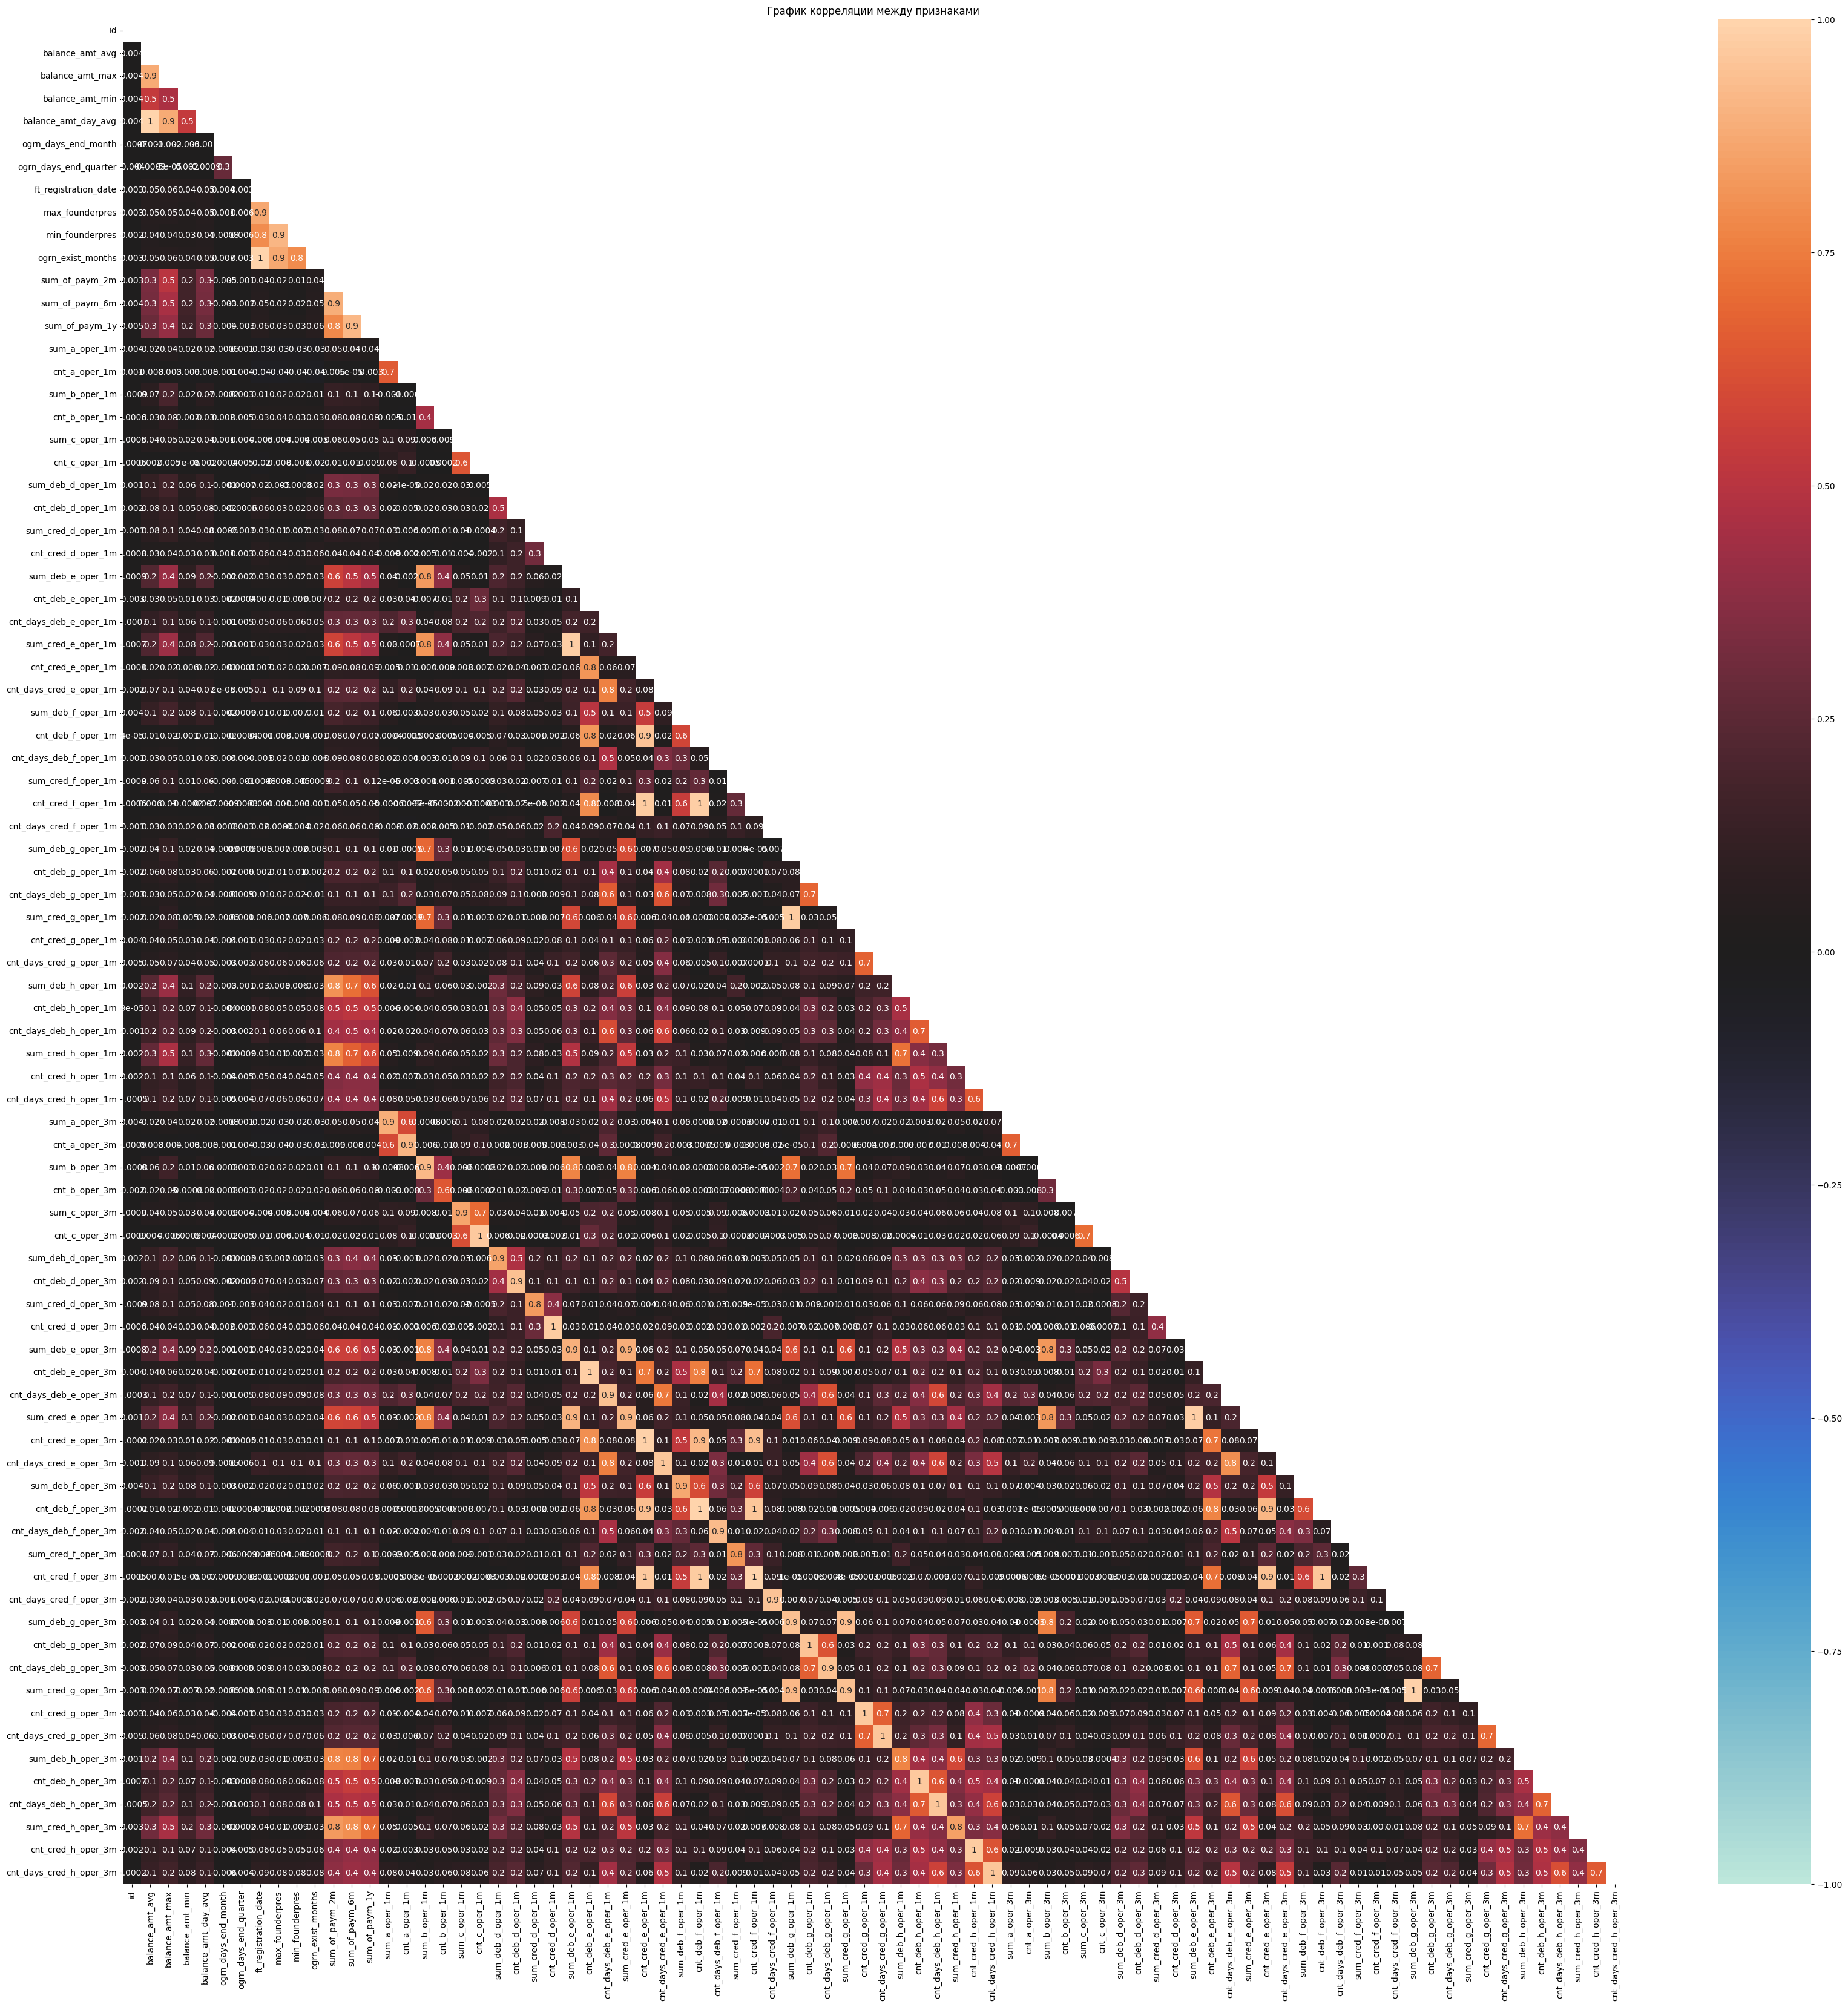

In [ ]:
plt.rcParams['figure.figsize'] = (40,40);
matrix = np.triu(train_data.corr(numeric_only=True));
heatmap = sns.heatmap(train_data.corr(),
                      annot=True,
                      fmt='.1g',
                      vmin=-1,
                      vmax=1,
                      center=0,
                      cmap=None,
                      linewidths=0,
                      linecolor='white',
                      mask=matrix);
heatmap.set_title('График корреляции между признаками');

__Выводы по тепловой карте__

Из полученной тепловой карты удалось выявить некоторые признаки, обладающие чрезмерной корреляцией с остальными.

1. Признак __balance_amt_max__ имеет большое количество корреляций выше 0.3. Помимо этого у данного признака наблюдается большое число корреляций с уровнем 0.5, а также корреляция 0.9 с признаком *balance_amt_day_avg*
2. Признак __balance_amt_day_avg__ имеет гиперкорреляцию с признаками *balance_amt_avg* и *balance_amt_min*
3. Признак __ft_registration_date__ имеет 3 гиперкорреляции в 0.8, 0.9 и 1 с признаками *min_founderpres*, *max_founderpres* и *ogrn_exist_months* соответственно
4. Признаки __sum_of_paym_2m__, __sum_of_paym_6m__ и __sum_of_paym_1y__ имеют примерно одинаковое количество гиперкорреляций, однако у признака __sum_of_paym_1y__ число и значения этих корреляций меньше, следовательно стоит исключить первые два признакаю
5. Следующий блок признаков, имеющий гиперкорреляции - это все признаки, показывающие число и суммы операций типа определенного типа за 1 месяц. Все эти признаки гиперкоррелированы с этими же признаками, но за 3 месяца. Следовательно стоит удалить признаки, показыавающие траты за 1 месяц, поскольку последние 3 месяца включают в себя последний месяц. Признаки к удалению: __sum_a_oper_1m__, __cnt_a_oper_1m__, __sum_b_oper_1m__, __cnt_b_oper_1m__, __sum_c_oper_1m__, __cnt_c_oper_1m__, __sum_deb_d_oper_1m__, __cnt_deb_d_oper_1m__, __sum_cred_d_oper_1m__, __cnt_cred_d_oper_1m__, __sum_deb_e_oper_1m__, __cnt_deb_e_oper_1m__, __cnt_days_deb_e_oper_1m__, __sum_cred_e_oper_1m__, __cnt_cred_e_oper_1m__, __cnt_days_cred_e_oper_1m__, __sum_deb_f_oper_1m__, __cnt_deb_f_oper_1m__, __cnt_days_deb_f_oper_1m__, __sum_cred_f_oper_1m__, __cnt_cred_f_oper_1m__, __cnt_days_cred_f_oper_1m__, __sum_deb_g_oper_1m__, __cnt_deb_g_oper_1m__, __cnt_days_deb_g_oper_1m__, __sum_cred_g_oper_1m__, __cnt_cred_g_oper_1m__, __cnt_days_cred_g_oper_1m__, __sum_deb_h_oper_1m__, __cnt_deb_h_oper_1m__, __cnt_days_deb_h_oper_1m__, __sum_cred_h_oper_1m__, __cnt_cred_h_oper_1m__, __cnt_days_cred_h_oper_1m__


In [ ]:
list_of_hypercorrelations = ['balance_amt_max', 'balance_amt_day_avg', 'ft_registration_date', 'sum_of_paym_2m',
                             'sum_of_paym_6m', 'sum_a_oper_1m', 'cnt_a_oper_1m', 'sum_b_oper_1m',
                             'cnt_b_oper_1m', 'sum_c_oper_1m', 'cnt_c_oper_1m', 'sum_deb_d_oper_1m',
                             'cnt_deb_d_oper_1m', 'sum_cred_d_oper_1m', 'cnt_cred_d_oper_1m', 'sum_deb_e_oper_1m',
                             'cnt_deb_e_oper_1m', 'cnt_days_deb_e_oper_1m', 'sum_cred_e_oper_1m', 'cnt_cred_e_oper_1m',
                             'cnt_days_cred_e_oper_1m', 'sum_deb_f_oper_1m', 'cnt_deb_f_oper_1m', 'cnt_days_deb_f_oper_1m',
                             'sum_cred_f_oper_1m', 'cnt_cred_f_oper_1m', 'cnt_days_cred_f_oper_1m', 'sum_deb_g_oper_1m',
                             'cnt_deb_g_oper_1m', 'cnt_days_deb_g_oper_1m', 'sum_cred_g_oper_1m', 'cnt_cred_g_oper_1m',
                             'cnt_days_cred_g_oper_1m', 'sum_deb_h_oper_1m', 'cnt_deb_h_oper_1m', 'cnt_days_deb_h_oper_1m',
                             'sum_cred_h_oper_1m', 'cnt_cred_h_oper_1m', 'cnt_days_cred_h_oper_1m']


__Выводы по тепловой карте__

После проведения анализа с помощью тепловой карты удалось выделить, что есть набор признаков, негативно влияющих на модель. Однако удаление их всех из данных невозможно, поскольку из-за этого они могут потерять актуальность и создать проблемы для обучения модели. Поэтому далее работа будет проводиться с датасетом с удаленными столбцами, однако с помощью методов Feature Engineering и Feature Importance Появится возможность избавить данные от гиперкоррелированных признаков